In [ ]:
im

# Figure 1

This notebook reproduces Fig. 1 of the paper. It requires the raw data to be stored in the folder "../Data".

Time series of hashtag types and tokens on the day, hour and minute scale.

In [1]:
import os, sys, codecs
import numpy as np
import pylab as plt
import pandas as pd
import gzip
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.cm as cm

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.pardir,'src')))

from modules_distributor import fit
from general import *

On the day scale

In [4]:
day_path = "../hashtags_frequency_day/"

day_files = get_zipped_files(day_path)
num_of_days = len(day_files)

day_files= sorted(day_files) # ensure the correct order

In [7]:
March_April_indices = []  # we zoom in on March and April.
list_of_dates = []  # extracting the dates of each file

for i in range(num_of_days):
    file = day_files[i]
    list_of_dates.append(file[19:29])
    if "2016-03" in file or "2016-04" in file:
        March_April_indices.append(i)

In [ ]:
# Types vs. tokens on a day by day basis

hashtag_count_by_day = []
total_count_by_day = []

for i in range(num_of_days):
    results_dict = get_data(day_path, day_files[i], "day")
    hashtags = len(list(results_dict.keys()))
    counts = sum(list(results_dict.values()))
    
    # Sorting out the corrupted files which have 0 hashtags (there is another file that has about 2000 hashtags)
    if hashtags < 500000:
        hashtags = float('nan')
        counts = float('nan')
        
    hashtag_count_by_day.append(hashtags)
    total_count_by_day.append(counts)

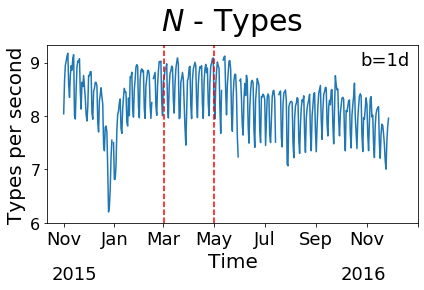

In [50]:
my_xticks =           ['Nov', 'Dec', 'Jan', 'Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
month_length = np.array([30,   31,    31,    28,   31,   30,    31,    30,     31,   31,    30,     31,   30,    31])

types_per_sec_d = [x/(24 * 60 * 60) for x in hashtag_count_by_day if not (x == None)] # types per second

plt.plot(list_of_dates, types_per_sec_d) 
plt.axvline(x = March_April_indices[0], color='r', linestyle='--') # 1st of April
plt.axvline(x = March_April_indices[-1], color='r', linestyle='--') # 30th of April
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Types per second', fontsize = 20)
plt.xticks(np.concatenate(([0], np.cumsum(month_length)))[::2], my_xticks[::2], fontsize = 18)
plt.yticks(np.arange(6,9+1), np.arange(6, 9+1), fontsize = 16)
plt.figtext(0.18, 0.01, "2015", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.figtext(0.85, 0.01, "2016", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.figtext(0.9, 0.75, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.title(r"$N$ - Types", fontsize = 30, y=1.05)
plt.tight_layout()
plt.show()

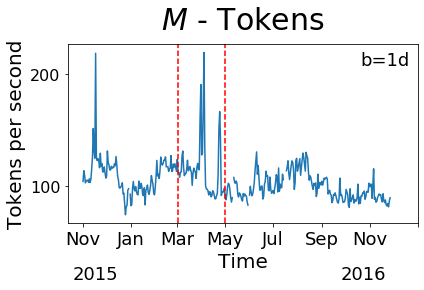

In [51]:
tokens_per_sec_d = [x/(24 * 60 * 60) for x in total_count_by_day if not (x == None)] # tokens per second

plt.plot(list_of_dates, tokens_per_sec_d)
plt.axvline(x = March_April_indices[0], color='r', linestyle='--') # 1st of April
plt.axvline(x = March_April_indices[-1], color='r', linestyle='--') # 30th of April
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Tokens per second', fontsize = 20)
plt.xticks(np.concatenate(([0], np.cumsum(month_length)))[::2], my_xticks[::2], fontsize = 18)
plt.yticks(np.arange(100, 220, 100), np.arange(100, 220, 100), fontsize = 16)
plt.figtext(0.9, 0.75, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.figtext(0.23, 0.01, "2015", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.figtext(0.85, 0.01, "2016", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.title(r"$M$ - Tokens", fontsize = 30, y=1.05)
plt.tight_layout()
plt.show()

# Zooming in on two month (March & April 2016 as we have the minute data for this)

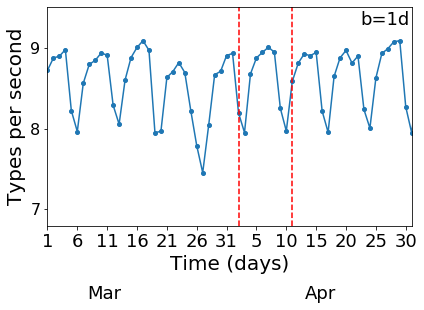

In [52]:
March_April_days = list(range(1, 31 + 1)) + list(range(1, 30 + 1)) # March has 31 days, April has 30 days

plt.plot(list_of_dates, types_per_sec_d, "o-", markersize = 4)
plt.axvline(x = March_April_indices[32], color='r', linestyle='--') # 2nd of April
plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.xlim(March_April_indices[0], March_April_indices[-1] + 1)
plt.xlabel('Time (days)', fontsize = 20)
plt.ylabel('Types per second', fontsize = 20)
plt.ylim(6.8, 9.5)                               # set the ylim to bottom, top
plt.xticks(np.arange(March_April_indices[0], March_April_indices[-1] + 1, 5), March_April_days[::5], fontsize = 18)
plt.yticks(np.arange(7, 9+1, 1), np.arange(7, 9+1, 1), fontsize = 16)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.figtext(0.25, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.figtext(0.75, -0.05, "Apr", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.tight_layout()
plt.show()

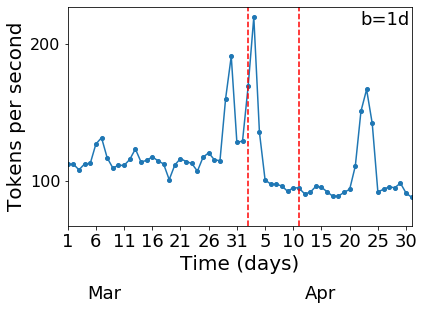

In [53]:
plt.plot(list_of_dates, tokens_per_sec_d, "o-", markersize = 4)
plt.axvline(x = March_April_indices[32], color='r', linestyle='--') # 2nd of April
plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.xlim(March_April_indices[0], March_April_indices[-1] + 1)
plt.xlabel('Time (days)', fontsize = 20)
plt.ylabel('Tokens per second', fontsize = 20)
plt.xticks(np.arange(March_April_indices[0], March_April_indices[-1] + 1, 5), March_April_days[::5], fontsize = 18)
plt.yticks(np.arange(100, 220, 100), np.arange(100, 220, 100), fontsize = 16)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.figtext(0.25, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.figtext(0.75, -0.05, "Apr", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.tight_layout()
plt.show()

# Zooming into a one 1 week window (2nd of April - 11th of April)

Using the hours data set now

In [22]:
hour_path = "../hashtags_frequency_hour/"

hour_files = get_zipped_files(hour_path)
num_of_hours = len(hour_files)

hour_files = sorted(hour_files)

In [25]:
one_week_indices = []

for i in range(num_of_hours):
    file = hour_files[i]
    if "2016-04-02" in file or "2016-04-11" in file:
        one_week_indices.append(i)

In [27]:
one_week_indices = list(range(one_week_indices[0], one_week_indices[-1] + 1)) 

hashtag_count_by_hour = []
total_count_by_hour = []

for i in one_week_indices:
    results_dict = get_data(hour_path, hour_files[i], "hour")
    hashtags = len(list(results_dict.keys()))
    counts = sum(list(results_dict.values()))
    
    # Sorting out the corrupted files which have 0 hashtags
    if hashtags == 0:
        hashtags = None
        counts = None
        
    hashtag_count_by_hour.append(hashtags)
    total_count_by_hour.append(counts)

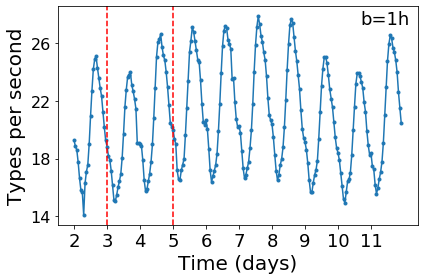

In [54]:
plt.plot(range(len(one_week_indices)), np.array(hashtag_count_by_hour)/(60*60), "o-", markersize = 3) # types per second
plt.axvline(x = 1 * 24, color='r', linestyle='--') # 3rd of April  ( from 6 + 2, we start from 2nd of April)
plt.axvline(x = 3 * 24, color='r', linestyle='--') # 5th of April
plt.xlabel('Time (days)', fontsize = 20)
plt.ylabel('Types per second', fontsize = 20)
plt.xticks(np.arange(0, len(one_week_indices), 24), np.arange(2, 11 + 1), fontsize = 18)
plt.yticks(np.arange(14, 28, 4), np.arange(14, 28, 4), fontsize = 16)
plt.figtext(0.9, 0.9, "b=1h", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.tight_layout()
plt.show()

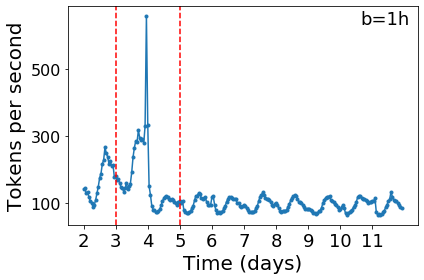

In [55]:
plt.plot(range(len(one_week_indices)), np.array(total_count_by_hour)/(60*60), "o-", markersize = 3) #tokens per second
plt.axvline(x = 1 * 24, color='r', linestyle='--') # 3rd of April  ( from 6 + 2, we start from 2nd of April)
plt.axvline(x = 3 * 24, color='r', linestyle='--') # 5th of April

plt.xlabel('Time (days)', fontsize = 20)
plt.ylabel('Tokens per second', fontsize = 20)
plt.xticks(np.arange(0, len(one_week_indices), 24), np.arange(2, 11 + 1), fontsize = 18)
plt.yticks(np.arange(100, 700, 200), np.arange(100, 700, 200), fontsize = 16)
plt.figtext(0.9, 0.9, "b=1h", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.tight_layout()
plt.show()

# Zooming in on a single day (3rd of April)

Using the minute data set now

In [31]:
min_path = "../hashtags_frequency_minutes/"

min_files = get_zipped_files(min_path)
num_of_mins = len(min_files)

min_files = sorted(min_files)

In [34]:
one_day_indices = []

for i in range(num_of_mins):
    file = min_files[i]
    if "2016-04-03" in file or "2016-04-04" in file:
        one_day_indices.append(i)

In [35]:
hashtag_count_by_min = []
total_count_by_min = []

for i in one_day_indices:
    results_dict = get_data(min_path, min_files[i], "min")
    hashtags = len(list(results_dict.keys()))
    counts = sum(list(results_dict.values()))
    
    # Sorting out the corrupted files which have 0 hashtags
    if hashtags == 0:
        print(day_files[i] + ", " + str(hashtags))
        hashtags = None
        counts = None
        
    hashtag_count_by_min.append(hashtags)
    total_count_by_min.append(counts)

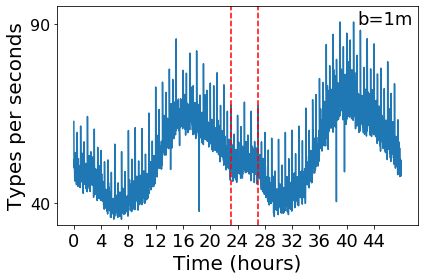

In [56]:
minute_indices = [23 * 60, 27 * 60]  # from 15:00 to 19:00 on April 3rd, for the final zoom plot

plt.plot(range(len(one_day_indices)), np.array(hashtag_count_by_min)/60) # types per second
plt.xlabel('Time (hours)', fontsize = 20)
plt.ylabel('Types per seconds', fontsize = 20)
plt.xticks(np.arange(0, len(one_day_indices), 60 * 4), np.arange(0, 48 + 1, 4), fontsize = 18)
plt.yticks(np.arange(40, 100, 50), np.arange(40, 100, 50), fontsize = 16)
plt.ylim(34, 95)
plt.figtext(0.9, 0.9, "b=1m", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.axvline(x = minute_indices[0], color='r', linestyle='--') # 3:00 PM 8th of April
plt.axvline(x = minute_indices[1], color='r', linestyle='--') # 7:00 PM 8th of April
plt.tight_layout()
plt.show()

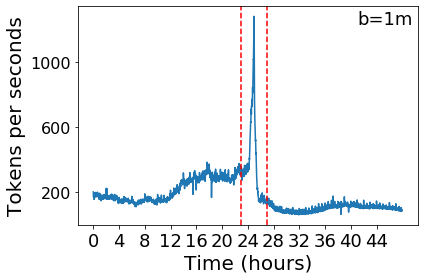

In [66]:
plt.plot(range(len(one_day_indices)), np.array(total_count_by_min)/60) #tokens per second
plt.xlabel('Time (hours)', fontsize = 20)
plt.ylabel('Tokens per seconds', fontsize = 20)
plt.xticks(np.arange(0, len(one_day_indices), 60 * 4), np.arange(0, 48 + 1, 4), fontsize = 18)
plt.yticks(np.arange(200, 1200, 400), np.arange(200, 1200, 400), fontsize = 16)
plt.figtext(0.9, 0.9, "b=1m", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.axvline(x = minute_indices[0], color='r', linestyle='--') # 3:00 PM 8th of April
plt.axvline(x = minute_indices[1], color='r', linestyle='--') # 7:00 PM 8th of April
plt.tight_layout()
plt.show()

# Zooming in onto a scale of 7 hours

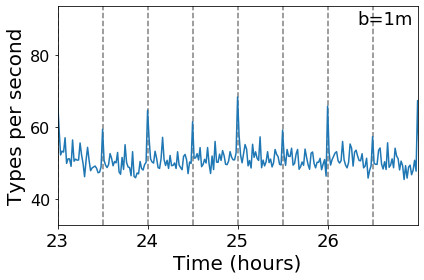

In [58]:
for i in range(minute_indices[0], minute_indices[1], 30):
    plt.axvline(x = i, color = "grey", linestyle = "--") # every 30 minutes

plt.plot(range(len(one_day_indices)), np.array(hashtag_count_by_min) /60) # types per second
plt.xlabel('Time (hours)', fontsize = 20)
plt.ylabel('Types per second', fontsize = 20)
plt.xlim(minute_indices[0], minute_indices[1])
plt.xticks(np.arange(minute_indices[0], minute_indices[1], 60), np.arange(minute_indices[0]//60, minute_indices[1]//60), fontsize = 18)
plt.yticks(np.arange(40, 100, 20), np.arange(40, 100, 20), fontsize = 16)
plt.figtext(0.9, 0.9, "b=1m", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.tight_layout()
plt.show()

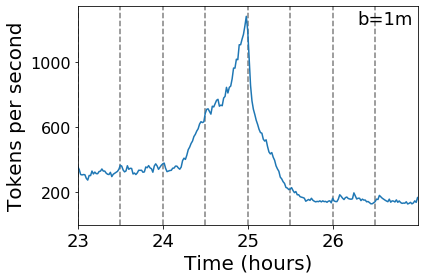

In [59]:
for i in range(minute_indices[0], minute_indices[1], 30):
    plt.axvline(x = i, color = "grey", linestyle = "--") # every 30 minutes

plt.plot(range(len(one_day_indices)), np.array(total_count_by_min)/60) # tokens per second
plt.xlabel('Time (hours)', fontsize = 20)
plt.ylabel('Tokens per second', fontsize = 20)
plt.xlim(minute_indices[0], minute_indices[1])
plt.xticks(np.arange(minute_indices[0], minute_indices[1], 60), np.arange(minute_indices[0]//60, minute_indices[1]//60), fontsize = 18)
plt.yticks(np.arange(200, 1200, 400), np.arange(200, 1200, 400), fontsize = 16)
plt.figtext(0.9, 0.9, "b=1m", wrap = True, horizontalalignment = 'center', fontsize = 18)  # inset label
plt.tight_layout()
plt.show()